In [ ]:
import pandas as pd
import numpy as np
from matplotlib.patches import Polygon 
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap 

def reproject(latitude, longitude):
    """Returns the x & y coordinates in meters using a sinusoidal projection"""
    earth_radius = 6371009 # in meters
    lat_dist = np.pi * earth_radius / 180.0

    y = latitude*lat_dist
    x = longitude * lat_dist * np.cos(np.radians(latitude))
    return x, y

def deproject(x,y):
    '''Returns the latitude and longitude coordinates from x and y'''
    earth_radius = 6371009 # in meters
    lat_dist = np.pi * earth_radius / 180.0

    latitude = y / lat_dist
    longitude = x / (np.cos(np.radians(latitude))* lat_dist)
    return latitude, longitude


def latlon_from_xygroup(xygroup):
    '''Returns corner 1 latitude and longitude, and corner 2 latitude and longitude.''' 
    '''xygroup looks like '-6571743.681047112 to -6474410.252330746, 1896264.6172766648 to 1993598.0459930308'''
    left_x = float(xygroup.split()[0])
    right_x = float(xygroup.split()[2][:-1])
    left_y = float(xygroup.split()[3])
    right_y = float(xygroup.split()[5])
    c1_lat, c1_lon = deproject(left_x, left_y)
    c2_lat, c2_lon = deproject(right_x, right_y)
    return c1_lat, c1_lon, c2_lat, c2_lon

# Plotting Stations

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_stations(binsize, hashid):

    df = pd.read_csv('BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    mean_lat = np.mean(lats)
    mean_lon = np.mean(lons)
    max_lat = np.max(lats)
    min_lat = np.min(lats)
    max_lon = np.max(lons)
    min_lon = np.min(lons)
    buffer = 3

    map = Basemap(projection='merc', resolution='l', 
                  lat_0=mean_lat, lon_0=mean_lon,
                  llcrnrlon=min_lon-buffer, llcrnrlat=min_lat-buffer,
                  urcrnrlon=max_lon+buffer, urcrnrlat=max_lat+buffer)

    map.drawmapboundary(fill_color='darkblue')
    map.fillcontinents(color='white',lake_color='darkblue', zorder=0)
    map.drawcoastlines()

    x, y = map(lons,lats)

    map.scatter(x, y, marker='o',color='r', alpha=0.7, zorder=10)

    plt.show()

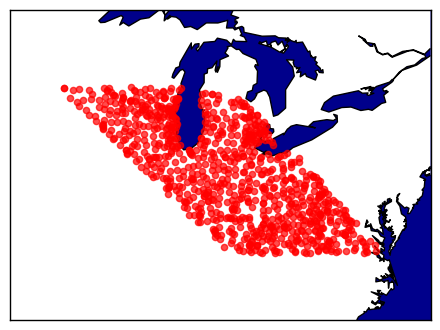

In [2]:
plot_stations(50, '7a12fe430a08c938daaaeab98da6a60744de60df8d6159d82fe3a764')

## Leaflet

### Plot Stations

In [3]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

In [4]:
leaflet_plot_stations(400, 'ba06c674e1bbe085f70f2cde04a98e78f46a1d7ae56ebdcd2a61c6ff')

### Plot Hull

In [5]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np


def leaflet_plot_hull(binsize, hashid):
    
    df = pd.read_csv('BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    points = np.array([lons,lats]).T
    hull = ConvexHull(points)

    plt.figure(figsize=(8,8))

    plt.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.3)

    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-', lw=5)

    return mplleaflet.display()

In [6]:
leaflet_plot_hull(400, 'ba06c674e1bbe085f70f2cde04a98e78f46a1d7ae56ebdcd2a61c6ff')